In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import random
import matplotlib as mpl

In [36]:
d_male = pd.read_csv('disclosed_male.csv',sep='|')

In [37]:
d_female = pd.read_csv('disclosed_female.csv',sep='|')

In [38]:
u_male = pd.read_csv('undisclosed_male.csv',sep = '|')

In [39]:
u_female = pd.read_csv('undisclosed_female.csv',sep='|')

In [6]:
d_male.head()

,Upvotes,Downvotes,Rating,Timestamp,Review_length,Grade_level,overall_sentiment,categories
0,0,0,4.0,1.359763e+09,23.0,7.0,0.9201,"[['Movies & TV', 'TV']]"
1,0,0,4.0,1.384992e+09,25.0,7.0,0.0000,"[['Movies & TV', 'TV']]"
2,0,0,5.0,1.392682e+09,176.0,8.0,0.9674,"[['Movies & TV', 'TV']]"
3,1,0,5.0,1.365725e+09,174.0,13.0,0.8020,"[['Movies & TV', 'TV']]"
4,45,0,4.0,1.044490e+09,414.0,7.0,0.9815,"[['Movies & TV', 'TV']]"


In [7]:
d_female.head()

,Upvotes,Downvotes,Rating,Timestamp,Review_length,Grade_level,overall_sentiment,categories
0,4,3,1.0,1.337386e+09,323.0,8.0,0.3071,"[['Movies & TV', 'TV']]"
1,0,0,5.0,1.342915e+09,34.0,6.0,0.9052,"[['Movies & TV', 'TV']]"
2,6,2,5.0,1.070496e+09,153.0,15.0,0.8176,"[['Movies & TV', 'TV']]"
3,0,0,5.0,1.366157e+09,22.0,5.0,0.8271,"[['CDs & Vinyl', 'Alternative Rock'], ['CDs & ..."
4,1,0,5.0,1.199664e+09,34.0,3.0,0.8225,"[['CDs & Vinyl', 'Alternative Rock'], ['CDs & ..."


In [8]:
u_male.head()

,Upvotes,Downvotes,Rating,Timestamp,Review_length,Grade_level,overall_sentiment,categories
0,0.0,0.0,5.0,1.357603e+09,53.0,9.0,0.8674,"[['Clothing, Shoes & Jewelry', 'Shoes & Access..."
1,1.0,0.0,3.0,1.359677e+09,113.0,42.0,0.9155,"[['Clothing, Shoes & Jewelry', 'Shoes & Access..."
2,0.0,0.0,4.0,1.353110e+09,53.0,4.0,0.8316,"[['Pet Supplies', 'Fish & Aquatic Pets', 'Aqua..."
3,1.0,0.0,2.0,1.350000e+09,176.0,9.0,0.2074,"[['Pet Supplies', 'Fish & Aquatic Pets', 'Aqua..."
4,0.0,0.0,2.0,1.359072e+09,49.0,5.0,0.9022,"[['Pet Supplies', 'Fish & Aquatic Pets', 'Aqua..."


In [9]:
u_female.head()

,Upvotes,Downvotes,Rating,Timestamp,Review_length,Grade_level,overall_sentiment,categories
0,0.0,0.0,5.0,1.404086e+09,2.0,15.0,0.4404,"[['Home & Kitchen', 'Bedding', 'Comforters & S..."
1,0.0,1.0,4.0,1.365725e+09,24.0,4.0,0.6597,"[['Home & Kitchen', 'Bedding', 'Comforters & S..."
2,0.0,0.0,2.0,1.398038e+09,68.0,4.0,0.9571,"[['Home & Kitchen', 'Bedding', 'Comforters & S..."
3,1.0,1.0,1.0,1.367539e+09,165.0,6.0,0.9241,"[['Home & Kitchen', 'Bedding', 'Comforters & S..."
4,0.0,0.0,5.0,1.395101e+09,21.0,8.0,0.8020,"[['Home & Kitchen', 'Bedding', 'Comforters & S..."


In [10]:
len(u_male)

14000866

In [11]:
len(u_female)

11929259

In [70]:
d_m_sample = d_male.sample(100000)
d_f_sample = d_female.sample(100000)
u_m_sample = u_male.sample(100000)
u_f_sample = u_female.sample(100000)

In [71]:
d_m_sample = d_m_sample[d_m_sample['Grade_level']>0]
d_f_sample = d_f_sample[d_f_sample['Grade_level']>0]
u_m_sample = u_m_sample[u_m_sample['Grade_level']>0]
u_f_sample = u_f_sample[u_f_sample['Grade_level']>0]

In [55]:
def plothist(d_m_sample,d_f_sample,u_m_sample,u_f_sample):
    bins = np.linspace(0, 1, 35)

    plt.hist(d_m_sample['overall_sentiment'], bins, alpha=0.5, label='disclosed male',color='b',density=True)
    plt.hist(d_f_sample['overall_sentiment'], bins, alpha=0.5, label='disclosed female',color='r',density=True)
    plt.hist(u_m_sample['overall_sentiment'], bins, alpha=0.5, label='undisclosed male',hatch='xxx',facecolor='none'\
             ,edgecolor='b',density=True)
    plt.hist(u_f_sample['overall_sentiment'], bins, alpha=0.5, label='undisclosed female',hatch='xxx',\
             facecolor='none',edgecolor='r',density=True)
    plt.legend(loc='upper left')
    plt.show()

{'bodies': [<matplotlib.collections.PolyCollection at 0x7efca306ac88>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7efca306abe0>,
 'cmins': <matplotlib.collections.LineCollection at 0x7efca30740f0>,
 'cbars': <matplotlib.collections.LineCollection at 0x7efca3074358>}

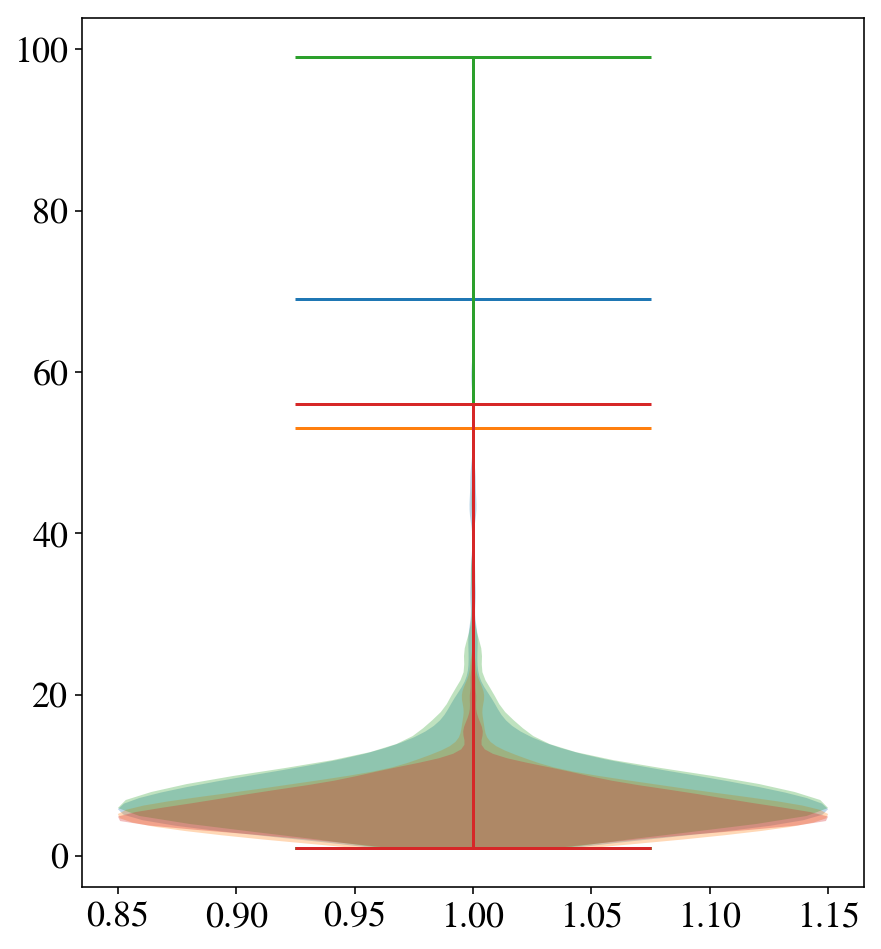

In [83]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
#mpl.style.use('classic')
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['font.size'] = 20
mpl.rcParams['figure.figsize'] =  7,8
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'

#plothist(d_m_sample,d_f_sample,u_m_sample,u_f_sample)
plt.violinplot(d_m_sample['Grade_level'],widths=0.3, showmeans=False, showextrema=True, showmedians=False,\
               )
plt.violinplot(d_f_sample['Grade_level'],widths=0.3, showmeans=False, showextrema=True, showmedians=False,\
              )
plt.violinplot(u_m_sample['Grade_level'],widths=0.3, showmeans=False, showextrema=True, showmedians=False,\
              )
plt.violinplot(u_f_sample['Grade_level'],widths=0.3, showmeans=False, showextrema=True, showmedians=False,\
              )

In [63]:
d_male = d_male.dropna()
d_female = d_female.dropna()
u_male = u_male.dropna()
u_female = u_female.dropna()

In [64]:
d_male = d_male[d_male['Grade_level']>=0]

In [65]:
d_female = d_female[d_female['Grade_level']>=0]

In [66]:
u_male = u_male[u_male['Grade_level']>=0]

In [67]:
u_female = u_female[u_female['Grade_level']>=0]

In [79]:
def plotBox(prop,ylabel):
    label = ['Disclosed Male','Disclosed Female','Undisclosed Male','Undisclosed Female']
#     data  = [d_male[prop].values,d_female[prop].values,u_male[prop].values,\
#            u_female[prop].values]
    
    data  = [d_m_sample[prop].values,d_f_sample[prop].values,u_m_sample[prop].values,\
           u_f_sample[prop].values]
    plt.figure()
    ax = plt.subplot(111)
    
    boxprops = dict(linestyle='-', linewidth=2, color='k')
    medianprops = dict(linestyle='-', linewidth=2, color='k')
    meanlineprops = dict(linestyle='-', linewidth=2.5, color='g')
    meanpointprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor='firebrick')
    
    box = plt.boxplot(data, widths=0.5,showfliers=False,notch=False,showmeans=True,patch_artist=True,boxprops=boxprops,
                medianprops=medianprops, meanprops=meanpointprops)
    
    #ax.set_xticks(pos)
    colors = ['blue', 'red', 'blue', 'red']
    i = 0
    for patch, color in zip(box['boxes'], colors):
        i+=1
        patch.set_color(color)
        if i>2:
            patch.set_hatch('xx')
            patch.set_fill(False)
        
    ax.set_xticklabels(label,rotation=30,horizontalalignment='right')
    plt.grid(linestyle='--')
    #plt.yscale('log')
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.savefig('plotsStat/'+prop+'.jpg',dpi=500)
    #plt.yscale('log')
    plt.show()

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

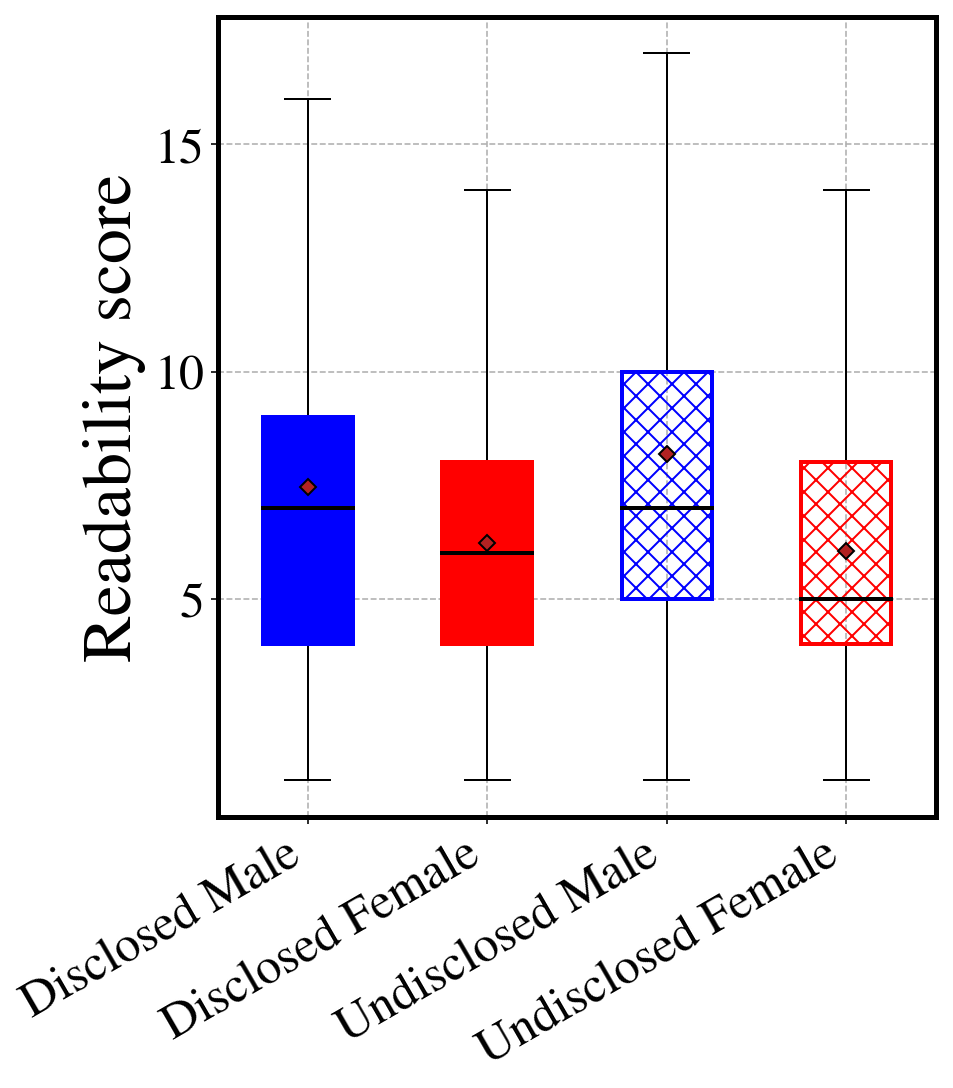

In [80]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
#mpl.style.use('classic')
mpl.rcParams['xtick.labelsize'] = 25
mpl.rcParams['ytick.labelsize'] = 25
mpl.rcParams['font.size'] = 20
mpl.rcParams['figure.figsize'] =  7,8
mpl.rcParams['axes.labelsize'] = 35
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['axes.linewidth'] = 2.5

plotBox('Grade_level','Readability score')

# Contribution ratio

In [230]:
d_male.head()

,Upvotes,Downvotes,Rating,Timestamp,Review_length,Grade_level,overall_sentiment,categories
0,0,0,4.0,1.359763e+09,23.0,7.0,0.9201,"[['Movies & TV', 'TV']]"
1,0,0,4.0,1.384992e+09,25.0,7.0,0.0000,"[['Movies & TV', 'TV']]"
2,0,0,5.0,1.392682e+09,176.0,8.0,0.9674,"[['Movies & TV', 'TV']]"
3,1,0,5.0,1.365725e+09,174.0,13.0,0.8020,"[['Movies & TV', 'TV']]"
4,45,0,4.0,1.044490e+09,414.0,7.0,0.9815,"[['Movies & TV', 'TV']]"


In [231]:
d_female.head()

,Upvotes,Downvotes,Rating,Timestamp,Review_length,Grade_level,overall_sentiment,categories
0,4,3,1.0,1.337386e+09,323.0,8.0,0.3071,"[['Movies & TV', 'TV']]"
1,0,0,5.0,1.342915e+09,34.0,6.0,0.9052,"[['Movies & TV', 'TV']]"
2,6,2,5.0,1.070496e+09,153.0,15.0,0.8176,"[['Movies & TV', 'TV']]"
3,0,0,5.0,1.366157e+09,22.0,5.0,0.8271,"[['CDs & Vinyl', 'Alternative Rock'], ['CDs & ..."
4,1,0,5.0,1.199664e+09,34.0,3.0,0.8225,"[['CDs & Vinyl', 'Alternative Rock'], ['CDs & ..."


In [273]:
categories = ['Books','Electronics','CDs & Vinyl','Clothing, Shoes & Jewelry','Home & Kitchen',\
             'Kindle Store','Sports & Outdoors','Cell Phones & Accessories', 'Toys & Games','Games','Literature & Fiction',\
             'Beauty','Health & Personal Care','Rock','Cases','Men','Movies','Computers','Women','Pop']

In [387]:
c_labels = ['Books','Electronics','CDs','Clothing','Home & Kitchen',\
             'Kindle Store','Sports','Cell Phones', 'Toys','Games','Literature',\
             'Beauty','Health','Rock','Cases','Men','Movies','Computers','Women','Pop']

In [235]:
len(categories)

21

In [236]:
def filterCategory(x,category):
    if category in x:
        return True
    return False

In [320]:
ratio = []
for category in categories:
    print(category)
    m_c = len(d_male[d_male['categories'].apply(lambda x:filterCategory(x,category))])
    f_c = len(d_female[d_female['categories'].apply(lambda x:filterCategory(x,category))])
    
    print(m_c,f_c)
    if m_c>f_c:
        ratio.append(m_c/f_c - 1)
    else:
        ratio.append(1 - f_c/m_c)

Books
4671065 6429325
Electronics
2665055 1170549
CDs & Vinyl
1271453 496601
Clothing, Shoes & Jewelry
978991 1770131
Home & Kitchen
807409 1166853
Kindle Store
493875 1009382
Sports & Outdoors
1027579 535946
Cell Phones & Accessories
860147 771383
Toys & Games
397721 711546
Games
1040884 1315368
Literature & Fiction
248781 706559
Beauty
201085 751656
Health & Personal Care
629393 734815
Rock
764278 239499
Cases
702945 750902
Men
667433 292541
Movies
1327271 924657
Computers
1190246 552930
Women
305691 1342652
Pop
1073399 433134


In [275]:
ratio

[-1.3764152286470002,
 2.2767564621387057,
 2.560310994138151,
 -1.8081177457198279,
 -1.4451820576684185,
 -2.0438005568210578,
 1.9173181626507148,
 1.1150712421715283,
 -1.7890581588601056,
 -1.2637027757175632,
 -2.840084250806935,
 -3.738001342715767,
 -1.1674978908249694,
 3.1911531989695154,
 -1.0682229761930164,
 2.2815024218827444,
 1.4354198367610909,
 2.1526160635161773,
 -4.392186881524154,
 2.4782145940979006]

In [321]:
ratio

[-0.37641522864700017,
 1.2767564621387057,
 1.5603109941381512,
 -0.8081177457198279,
 -0.44518205766841845,
 -1.0438005568210578,
 0.9173181626507148,
 0.11507124217152831,
 -0.7890581588601056,
 -0.2637027757175632,
 -1.8400842508069348,
 -2.738001342715767,
 -0.16749789082496935,
 2.1911531989695154,
 -0.06822297619301643,
 1.2815024218827444,
 0.43541983676109086,
 1.1526160635161773,
 -3.392186881524154,
 1.4782145940979006]

In [390]:
def plotResults(ratio):
    #plt.rcdefaults()
    fig, ax = plt.subplots()

    y_pos = np.arange(len(categories))
    color = []
    for i in ratio:
        if i>0:
            color.append('b')
    
        else:
            color.append('r')

    barlist = ax.bar(y_pos, ratio, align='center')
    for i,thisbar in enumerate(barlist.patches):
        thisbar.set_color(color[i])
    
    majorLocator = MultipleLocator(20)
    majorFormatter = FormatStrFormatter('%d')
    minorLocator = MultipleLocator(2.5)

    ax.xaxis.set_major_locator(majorLocator)
    ax.xaxis.set_major_formatter(majorFormatter)

    # for the minor ticks, use no labels; default NullFormatter
    ax.xaxis.set_minor_locator(minorLocator)

    
    ax.set_yticks(y_pos)
    plt.xlim(-1,20)
    plt.ylim(-4,4)
    ax.set_yticklabels(categories)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Category')
    ax.set_ylabel('Ratio')
    y_pos = np.arange(-4,4,step=1)
    ax.set_yticks(y_pos)
    ax.set_yticklabels([5,4,3,2,1,2,3,4,5])
    x_pos = np.arange(0,20,step=1)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(c_labels,rotation=55,horizontalalignment='right')
    plt.axhline(0, color='black')
    plt.grid(linestyle='--')
    #title = grp_1+'_'+grp_2+'.jpg'
    plt.tight_layout()
    plt.savefig('plotsStat/category_ratio.jpg',dpi=500)
    #plt.savefig('plotsNatural/'+title,dpi=1000)
    #plt.savefig('plotNatural/'+title, format='svg', dpi=1200)
    plt.show()

In [3]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

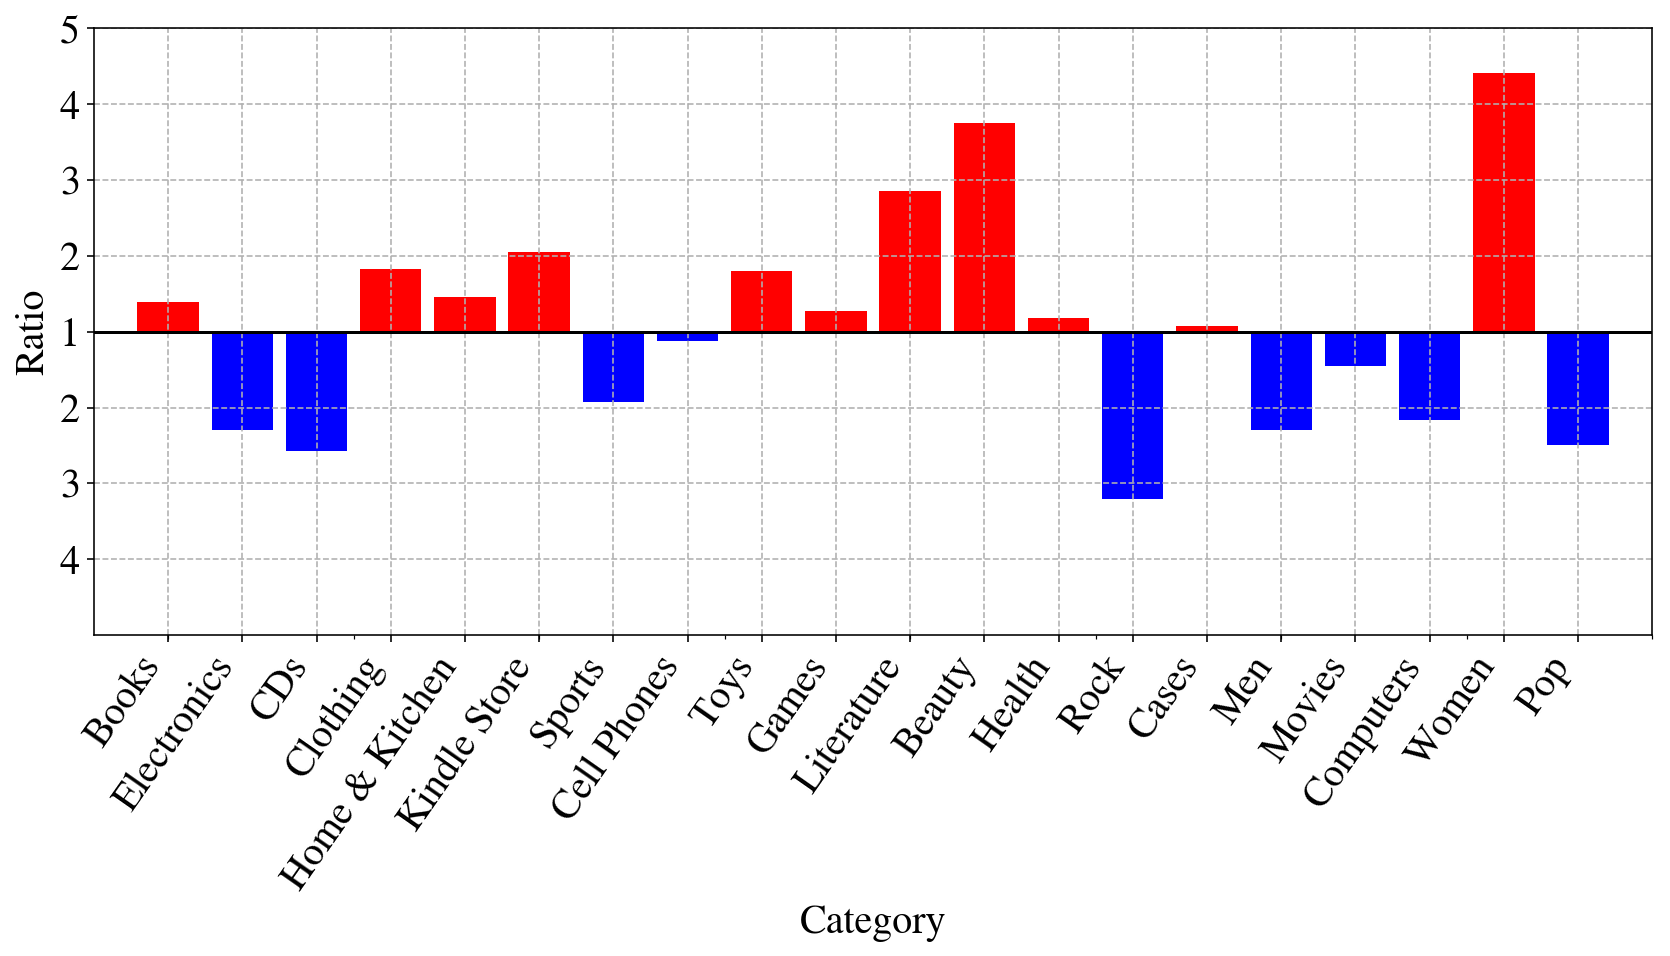

In [392]:
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['font.size'] = 20
mpl.rcParams['figure.figsize'] =  12,7
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'

plotResults(ratio)

# Plotting upvotes/downvotes

In [395]:
x = d_m_sample['Upvotes'].unique()

In [404]:
x = sorted(x,reverse=True)

In [405]:
len(x)

206

In [406]:
y_pos = np.arange(len(x))

In [52]:
def getProp(prop):

    d_m = sorted(d_male.sample(1000000)[prop],reverse=True)
    d_f = sorted(d_female.sample(1000000)[prop],reverse=True)
    u_m = sorted(u_male.sample(1000000)[prop],reverse=True)
    u_f = sorted(u_female.sample(1000000)[prop],reverse=True)
    
    return d_m,d_f,u_m,u_f

In [53]:
d_m_u,d_f_u,u_m_u,u_f_u = getProp('Upvotes')

In [50]:
def plotVotes(d_m,d_f,u_m,u_f,prop):
    
    data = [d_m,d_f,u_m,u_f]
    
    color = ['b','r','b','r']
    linestyle = ['-','-','--','--']
    width = 2.5
    label = ['Disclosed male','Disclosed female','Undisclosed male','Undisclosed female']
    i = 0
    
    majorLocator = MultipleLocator(20)
    majorFormatter = FormatStrFormatter('%d')
    minorLocator = MultipleLocator(2.5)

    ax.xaxis.set_major_locator(majorLocator)
    ax.xaxis.set_major_formatter(majorFormatter)

    # for the minor ticks, use no labels; default NullFormatter
    ax.xaxis.set_minor_locator(minorLocator)
    
    
    for d in data:
        y_pos = np.arange(len(d))
        
        plt.plot(y_pos,d, color=color[i],linewidth=width,label=label[i],linestyle=linestyle[i])
        plt.xscale('log')
        plt.yscale('log')
    
        i+=1
    plt.grid(linestyle='--')
    plt.xlabel('Rank')
    plt.ylabel(prop)
    plt.legend(loc='lower left')
    plt.tight_layout()
    plt.savefig('plotsStat/'+prop+'.jpg',dpi=500)
    plt.show()

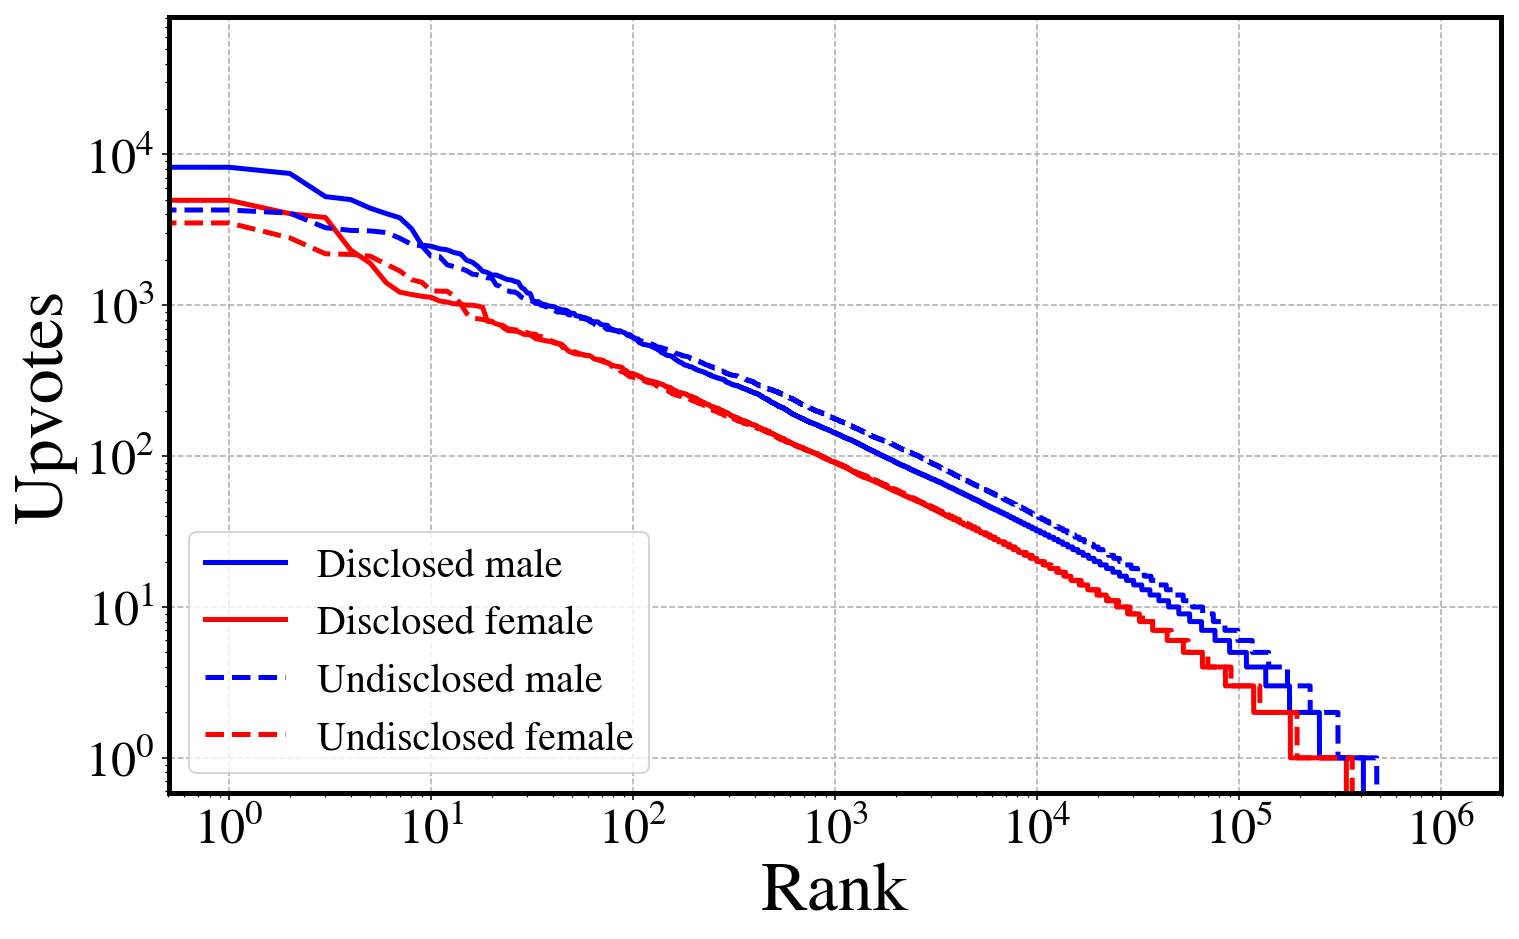

In [54]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
#mpl.style.use('classic')
mpl.rcParams['xtick.labelsize'] = 25
mpl.rcParams['ytick.labelsize'] = 25
mpl.rcParams['font.size'] = 20
mpl.rcParams['figure.figsize'] =  11,7
mpl.rcParams['axes.labelsize'] = 35
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['axes.linewidth'] = 2.5

plotVotes(d_m_u,d_f_u,u_m_u,u_f_u,'Upvotes')

In [55]:
d_m_d,d_f_d,u_m_d,u_f_d = getProp('Downvotes')

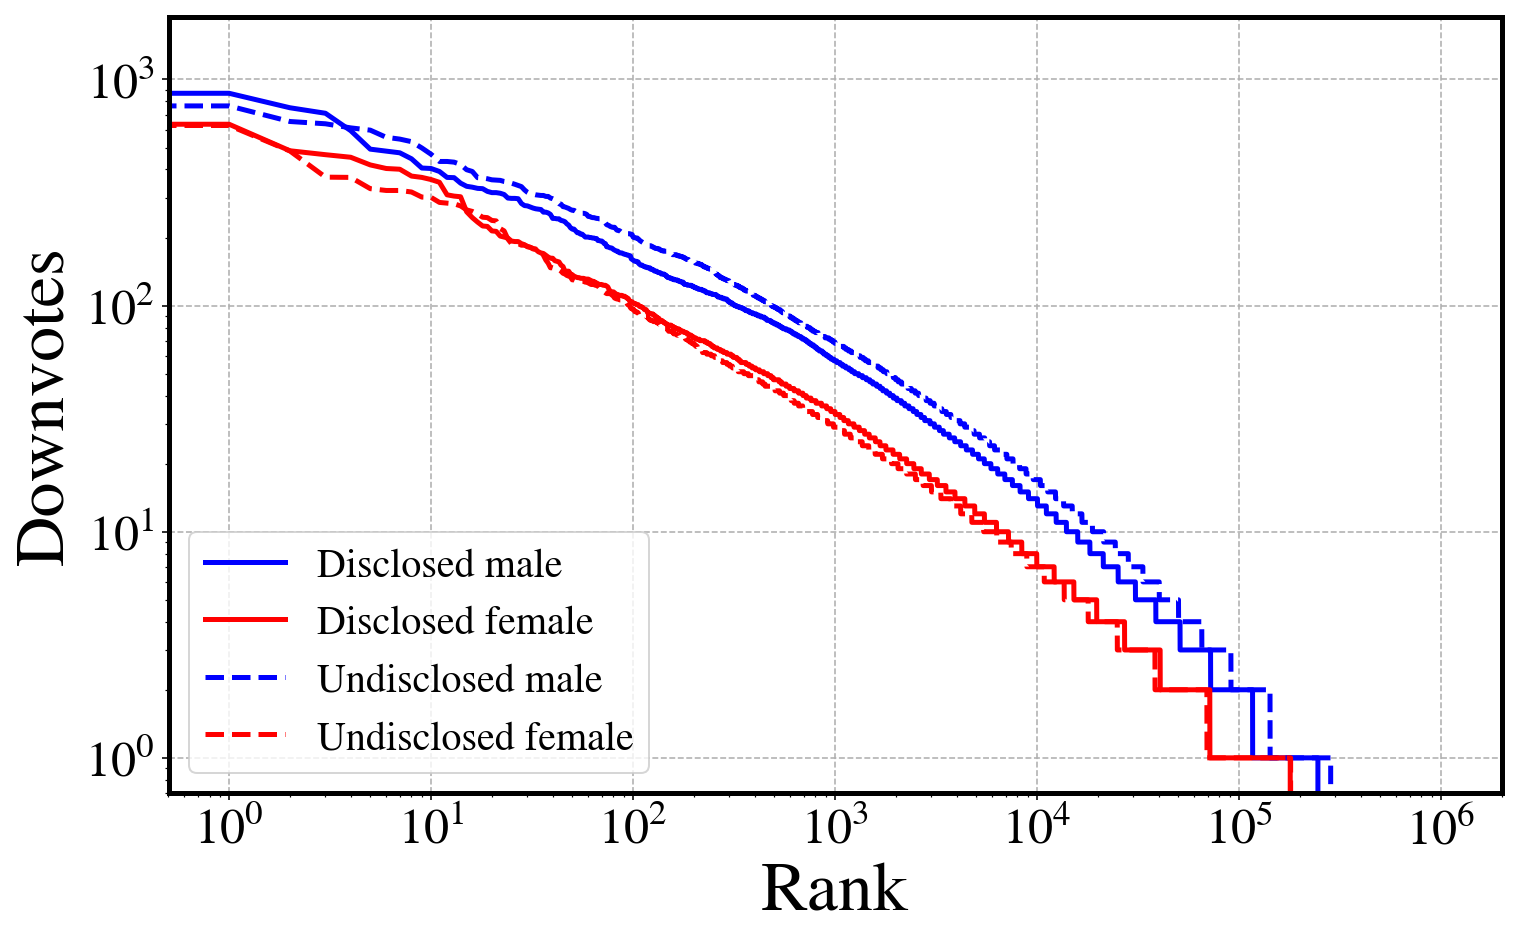

In [56]:
plotVotes(d_m_d,d_f_d,u_m_d,u_f_d,'Downvotes')

In [438]:
d_male.head()

,Upvotes,Downvotes,Rating,Timestamp,Review_length,Grade_level,overall_sentiment,categories
0,0,0,4.0,1.359763e+09,23.0,7.0,0.9201,"[['Movies & TV', 'TV']]"
1,0,0,4.0,1.384992e+09,25.0,7.0,0.0000,"[['Movies & TV', 'TV']]"
2,0,0,5.0,1.392682e+09,176.0,8.0,0.9674,"[['Movies & TV', 'TV']]"
3,1,0,5.0,1.365725e+09,174.0,13.0,0.8020,"[['Movies & TV', 'TV']]"
4,45,0,4.0,1.044490e+09,414.0,7.0,0.9815,"[['Movies & TV', 'TV']]"


In [57]:
d_male['helpfulness'] = d_male['Upvotes'] - d_male['Downvotes']

In [440]:
d_male.head()

,Upvotes,Downvotes,Rating,Timestamp,Review_length,Grade_level,overall_sentiment,categories,helpfulness
0,0,0,4.0,1.359763e+09,23.0,7.0,0.9201,"[['Movies & TV', 'TV']]",0
1,0,0,4.0,1.384992e+09,25.0,7.0,0.0000,"[['Movies & TV', 'TV']]",0
2,0,0,5.0,1.392682e+09,176.0,8.0,0.9674,"[['Movies & TV', 'TV']]",0
3,1,0,5.0,1.365725e+09,174.0,13.0,0.8020,"[['Movies & TV', 'TV']]",1
4,45,0,4.0,1.044490e+09,414.0,7.0,0.9815,"[['Movies & TV', 'TV']]",45


In [58]:
d_female['helpfulness'] = d_female['Upvotes'] - d_female['Downvotes']

In [59]:
u_male['helpfulness'] = u_male['Upvotes'] - u_male['Downvotes']

In [60]:
u_female['helpfulness'] = u_female['Upvotes'] - u_female['Downvotes']

In [446]:
u_male.head()

,Upvotes,Downvotes,Rating,Timestamp,Review_length,Grade_level,overall_sentiment,categories,helpfulness
0,0.0,0.0,5.0,1.357603e+09,53.0,9.0,0.8674,"[['Clothing, Shoes & Jewelry', 'Shoes & Access...",0.0
1,1.0,0.0,3.0,1.359677e+09,113.0,42.0,0.9155,"[['Clothing, Shoes & Jewelry', 'Shoes & Access...",1.0
2,0.0,0.0,4.0,1.353110e+09,53.0,4.0,0.8316,"[['Pet Supplies', 'Fish & Aquatic Pets', 'Aqua...",0.0
3,1.0,0.0,2.0,1.350000e+09,176.0,9.0,0.2074,"[['Pet Supplies', 'Fish & Aquatic Pets', 'Aqua...",1.0
4,0.0,0.0,2.0,1.359072e+09,49.0,5.0,0.9022,"[['Pet Supplies', 'Fish & Aquatic Pets', 'Aqua...",0.0


In [61]:
d_m_h,d_f_h,u_m_h,u_f_h = getProp('helpfulness')

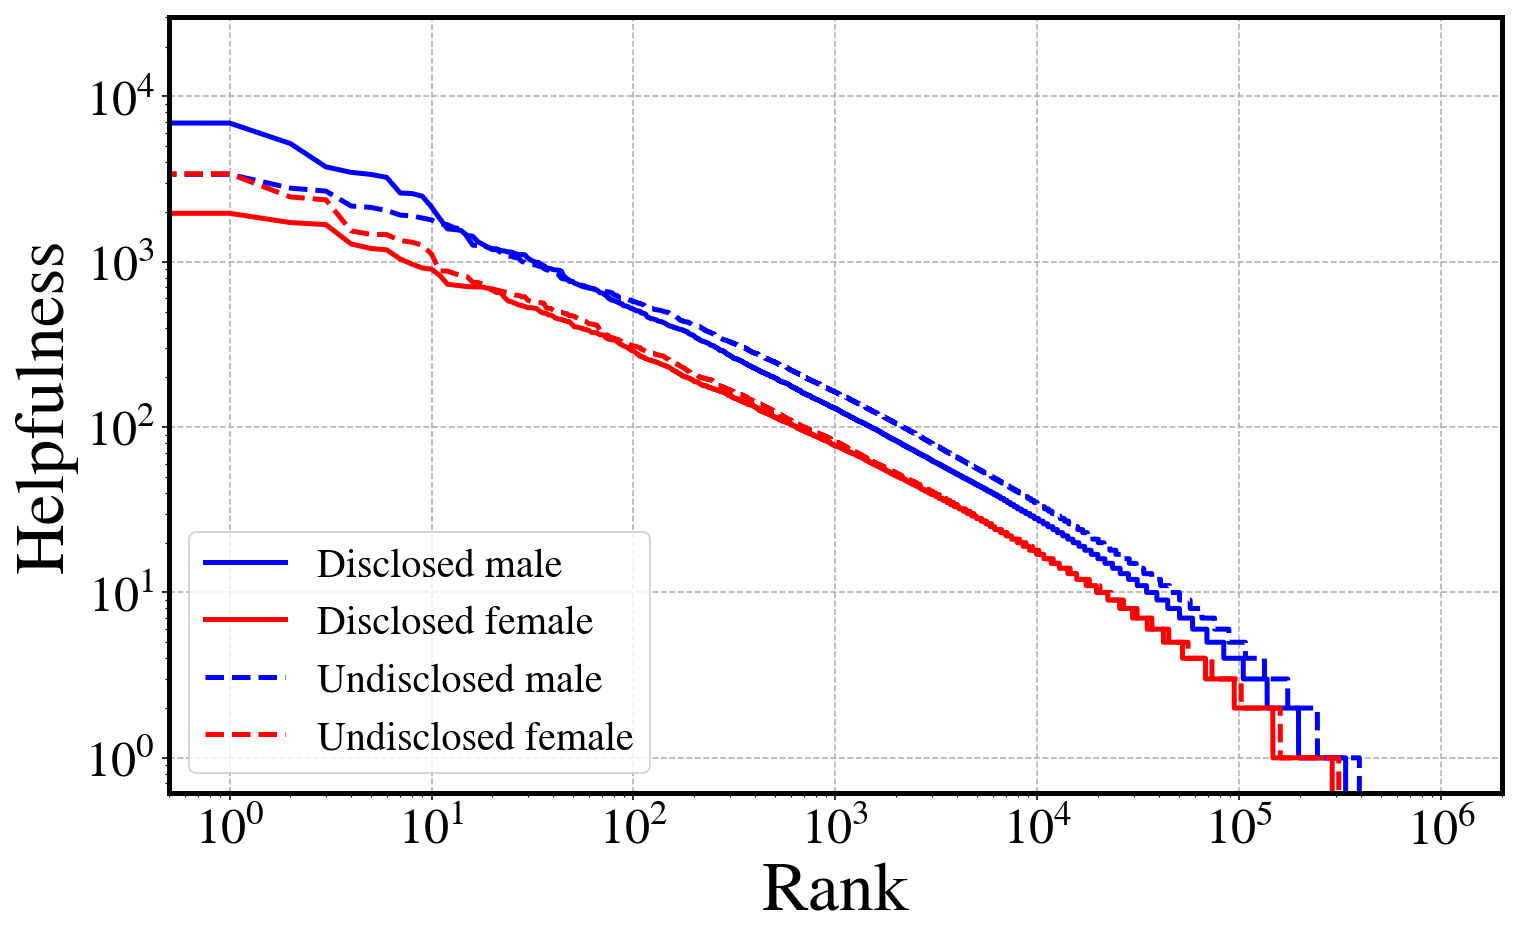

In [62]:
plotVotes(d_m_h,d_f_h,u_m_h,u_f_h,'Helpfulness')

In [450]:
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['font.size'] = 20
mpl.rcParams['figure.figsize'] =  8,7
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'

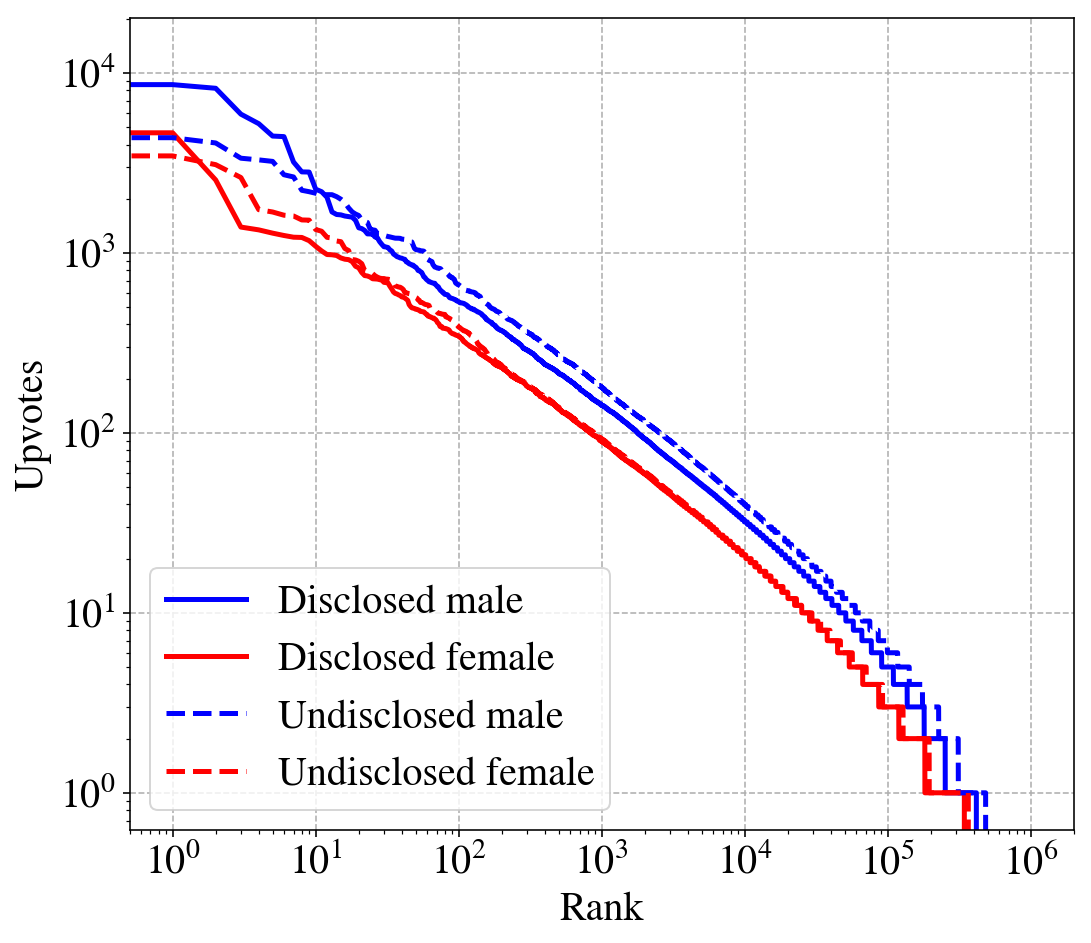

In [453]:
plotVotes(d_m_u,d_f_u,u_m_u,u_f_u,'Upvotes')

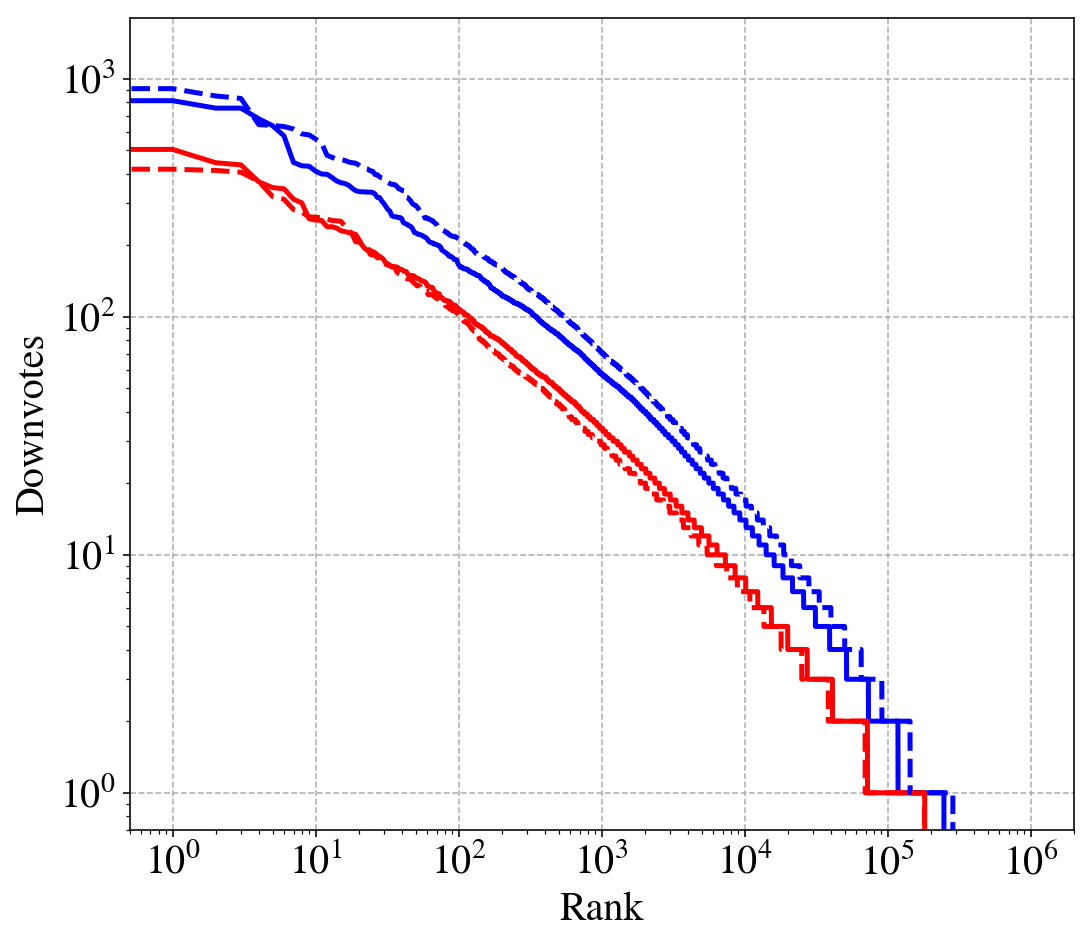

In [455]:
plotVotes(d_m_d,d_f_d,u_m_d,u_f_d,'Downvotes')

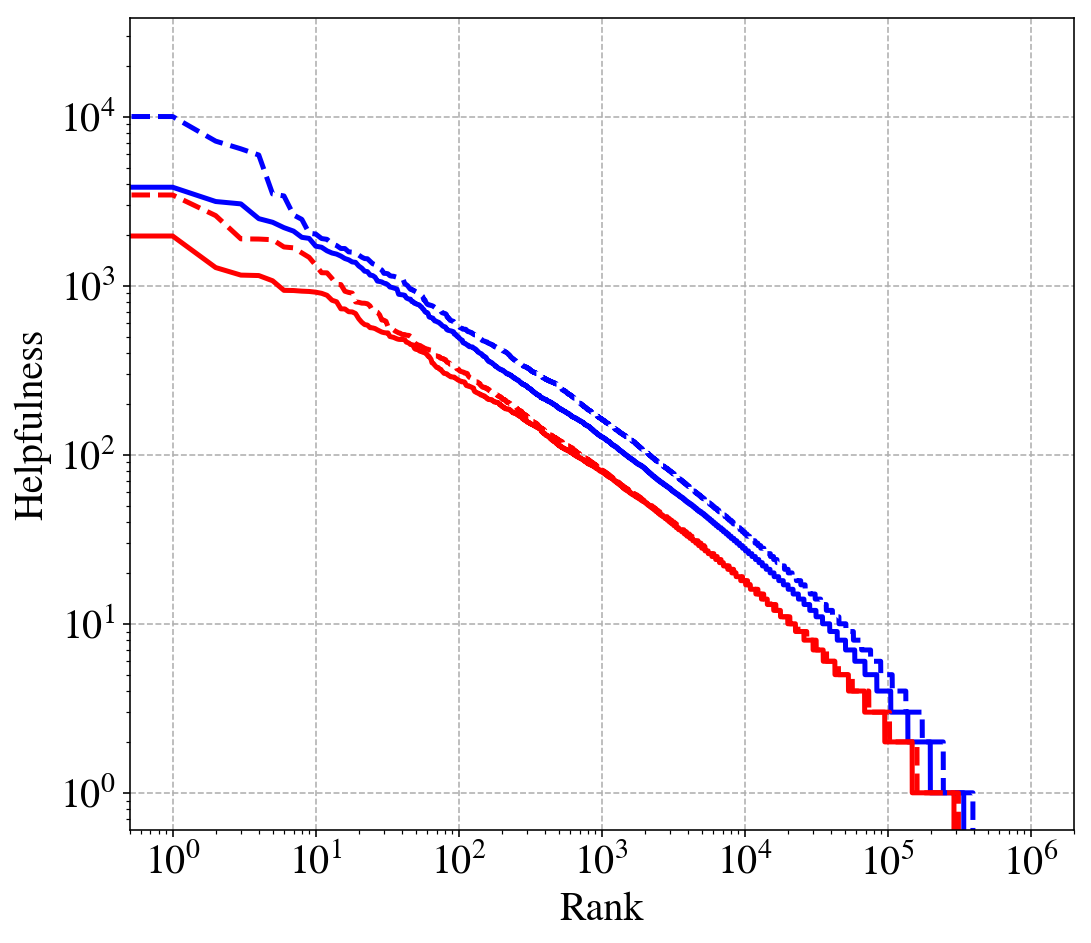

In [456]:
plotVotes(d_m_h,d_f_h,u_m_h,u_f_h,'Helpfulness')

# Summary plot

In [4]:
from matplotlib.lines import Line2D

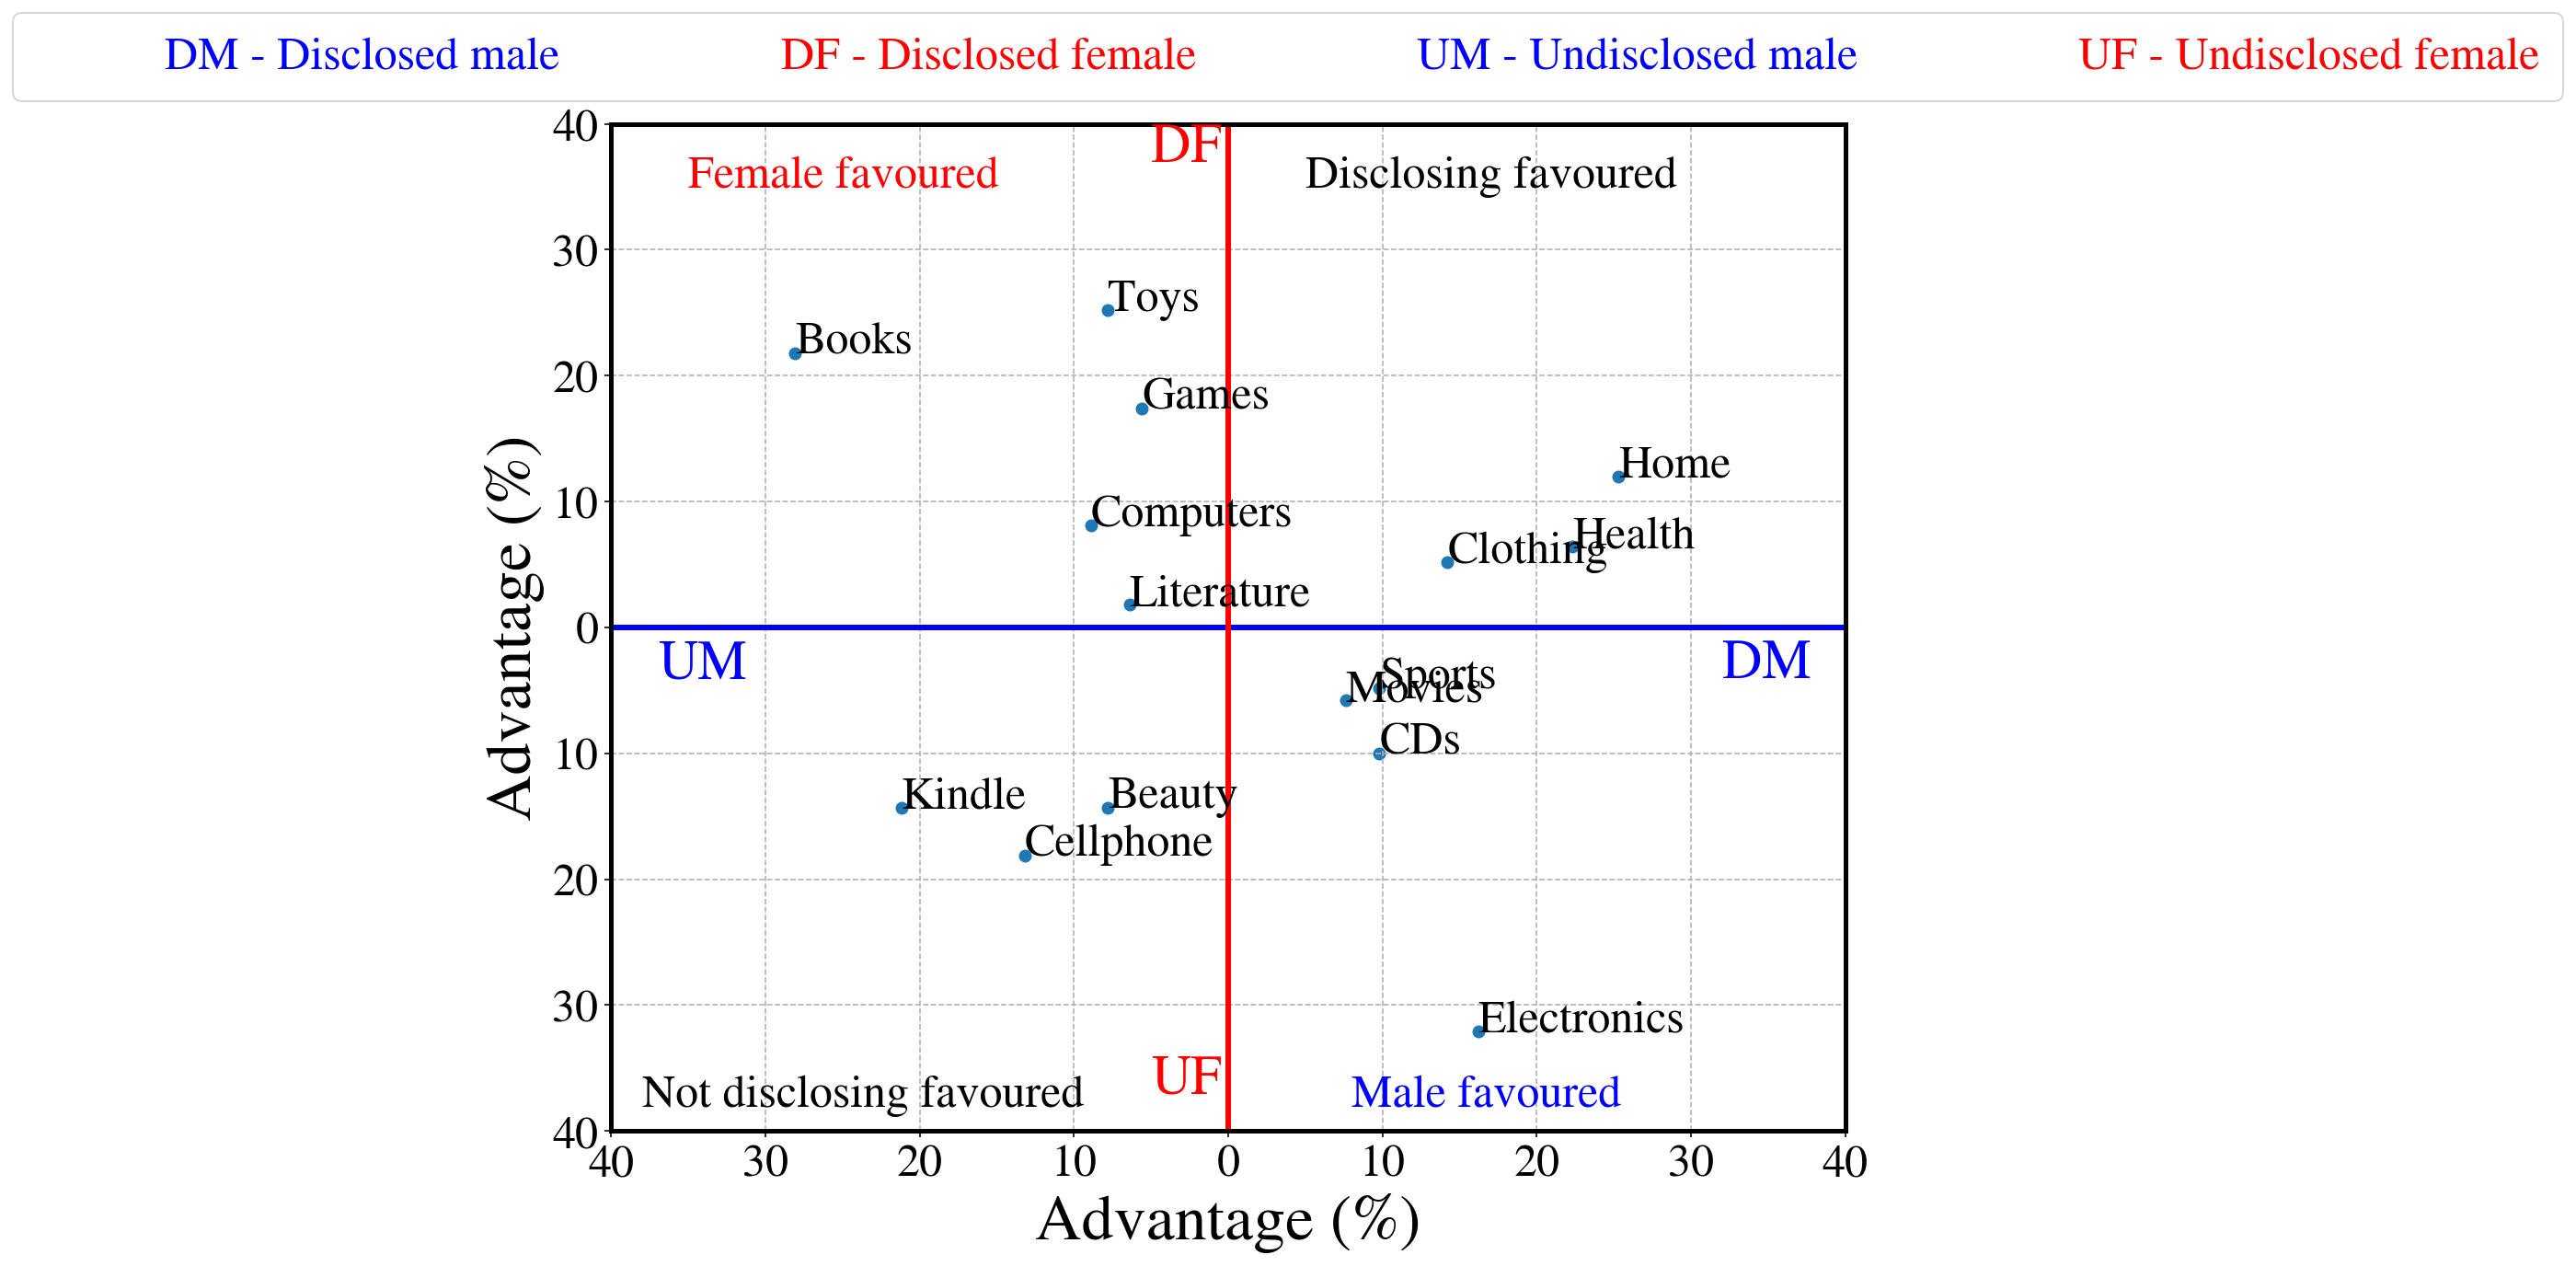

In [155]:
mpl.rcParams['xtick.labelsize'] = 25
mpl.rcParams['ytick.labelsize'] = 25
mpl.rcParams['font.size'] = 20
mpl.rcParams['figure.figsize'] =  20,10
mpl.rcParams['axes.labelsize'] = 35
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['axes.linewidth'] = 2.5

female = [21.8, -32.1, -10, 5.2, 12, -14.3, -4.8, -18.1, 25.2, 17.4,1.8,-14.3,6.4,-5.8,8.1]
male = [-28.1, 16.2, 9.8, 14.2, 25.3, -21.2, 9.8, -13.2, -7.8, -5.6, -6.4, -7.8, 22.3, 7.6, -8.9]
n = ['Books', 'Electronics', 'CDs', 'Clothing', 'Home', 'Kindle','Sports','Cellphone','Toys','Games','Literature'
    ,'Beauty','Health','Movies','Computers']

fig, ax = plt.subplots()
ax.scatter(male, female)
ax.axhline(0, color='b',linewidth=3.0)
ax.axvline(0, color='r',linewidth=3.0)
plt.xlim(-35,35)
plt.ylim(-35,35)
plt.grid(linestyle='--')
y_pos = np.arange(-40,50,step=10)
ax.set_yticks(y_pos)
x_pos = np.arange(-40,50,step=10)
ax.set_xticks(x_pos)
ax.set_yticklabels([40,30,20,10,0,10,20,30,40])
ax.set_xticklabels([40,30,20,10,0,10,20,30,40])

plt.text(-37, -4, 'UM', fontsize=30, color='b')
plt.text(32, -4, 'DM', fontsize=30, color='b')
plt.text(-5, 37, 'DF', fontsize=30, color='r')
plt.text(-5, -37, 'UF', fontsize=30, color='r')

plt.text(-35,35,'Female favoured',color='r',size=25)
plt.text(5,35,'Disclosing favoured',color='black',size=25)
plt.text(-38,-38,'Not disclosing favoured',color='black',size=25)
plt.text(8,-38,'Male favoured',color='b',size=25)
#plt.box(on=None)
plt.xlabel('Advantage (%)')
plt.ylabel('Advantage (%)')
for i, txt in enumerate(n):
    ax.annotate(txt, (male[i], female[i]),fontsize=25)

legend_elements = [Line2D([0], [0], markerfacecolor='b', color='w', label='DM - Disclosed male', markersize=15),
                Line2D([0], [0], markerfacecolor='r', color='w', label='DF - Disclosed female', markersize=15),
                Line2D([0], [0], markerfacecolor='b', color='w', label='UM - Undisclosed male', markersize=15),
                Line2D([0], [0], markerfacecolor='r', color='w', label='UF - Undisclosed female', markersize=15) ]

    
leg = ax.legend(handles=legend_elements, loc="lower right",bbox_to_anchor=(1.6, 1),prop={'size': 25},ncol=4,
               borderpad=0.5)    
i = 0
for text in leg.get_texts():
    if i==0 or i==2:
        plt.setp(text, color = 'b')
    else:
        plt.setp(text, color = 'R')
    i+=1    
#plt.show()    
plt.tight_layout()

plt.savefig('plotsNatural/summary.jpg',dpi=250,bbox_extra_artists=(leg,), bbox_inches='tight')    

# Name experiments

In [93]:
import csv
import string

In [87]:
df_male = pd.read_csv('../amazon_gender_new/amazon_male_all.csv',sep='|',quoting=csv.QUOTE_NONE)

In [88]:
df_female = pd.read_csv('../amazon_gender_new/amazon_female_all.csv',sep='|',quoting=csv.QUOTE_NONE)

In [110]:
male_names = df_male.sample(132)['Name']

In [94]:
translator = str.maketrans('', '', string.punctuation)

In [95]:
def getFirstNames(names):
    first_names = []
    for name in names:
        name = name.translate(translator)
        f_name = name.split()[0]
        first_names.append(f_name)
    return first_names    

In [122]:
def assignLabel(names,label):
    d = {}
    for n in names:
        d[n] = label
    return d    

In [111]:
m_f_names = getFirstNames(male_names)

In [125]:
label_male = assignLabel(m_f_names,0)

In [113]:
female_names = df_female.sample(168)['Name']

In [114]:
f_f_names = getFirstNames(female_names)

In [127]:
label_female = assignLabel(f_f_names,1)

In [116]:
all_names = m_f_names + f_f_names

In [117]:
import random

In [118]:
random.shuffle(all_names)

In [119]:
len(all_names)

300

In [106]:
len(all_names[:100])

100

In [129]:
for i in range(3):
    data = {'Name':all_names[i*100:(i+1)*100]}
    df = pd.DataFrame(data=data)
    fname = 'set_'+str(i+1)+'.csv'
    df.to_csv(fname,index=False)

In [130]:
df.head()

,Name
0,ROSANNE
1,tami
2,Simone
3,Karen
4,Kathy
